### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv(r'C:\Users\j\Desktop\Dataset\kc_house_data.csv')
data.head(10) # showing first 10 records

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Finding duplicate Records

In [5]:
data.duplicated('id').sum()

177

### Droping them

In [6]:
data =data.drop_duplicates(subset=['id'])

### After droping

In [7]:
data.duplicated('id').sum()

0

### Formating 'date' column to Date_time format

In [8]:
data['date'] = pd.to_datetime(data['date'])

data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### Making new column named total_area

In [9]:
data['total_area'] = data['sqft_living'] + data['sqft_lot']

### Making to column named property_age

In [10]:
data['property_age'] = 2025 - data['yr_built'] # Counting from 2025(present)


### MAking new column named renovated_age

In [11]:
data['renovated_age'] = 2025 - np.where(data['yr_renovated'] > 0,
                                        data['yr_renovated'],
                                        data['yr_built'])


### Making new column named price per square foot

In [12]:
data['price per square foot'] = (data['price']/ data['sqft_living']).round(2)

### Making new columns named renovated_house and has_basement

In [13]:
data['renovated_house'] = (data['yr_renovated']> 0).astype('int')
data['has_basement'] =(data['sqft_basement'] > 0).astype('int')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,total_area,property_age,renovated_age,price per square foot,renovated_house,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,6830,70,70,188.05,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,9812,74,34,209.34,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,10770,92,92,233.77,0,0


### Using interquantile range(IQR) to find outleir range and filling the outleir by min_range and max_range.

In [14]:
def outlier_handling(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    min_range = Q1 - 1.5*IQR
    max_range = Q3 + 1.5*IQR
    
    outliers = data[(data[column] < min_range) | (data[column] > max_range)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    data[column] = np.where(data[column]> max_range,max_range,np.where(data[column] < min_range,min_range,data[column]))
    
    return data
    
outlier_columns = ['price', 'sqft_living', 'sqft_lot', 'price per square foot', 'total_area','property_age']
for col in outlier_columns:
    data = outlier_handling(col)
print("Outliers handled using IQR method and filled up with max_range and min_range")

Number of outliers in price: 1139
Number of outliers in sqft_living: 569
Number of outliers in sqft_lot: 2409
Number of outliers in price per square foot: 697
Number of outliers in total_area: 2404
Number of outliers in property_age: 0
Outliers handled using IQR method and filled up with max_range and min_range


### 

### Verifing if outlier gone. 

Text(0.5, 1.0, 'Price Boxplot')

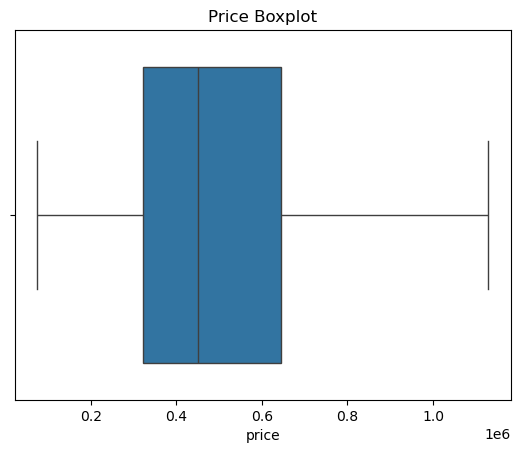

In [15]:
sns.boxplot(x=data['price'],data=data)
plt.title('Price Boxplot')

* No outliers detected

### Summary Statistics for Numerical Features.

In [16]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,total_area,property_age,renovated_age,price per square foot,renovated_house,has_basement
count,2.143600e+04,21436,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,...,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,4.580765e+09,2014-10-28 05:22:26.893076992,5.119067e+05,3.371571,2.117349,2060.651148,8707.582601,1.496198,0.007604,0.235118,...,47.560156,-122.213697,1988.314378,12785.961280,10787.589546,53.901567,51.509703,261.211295,0.042452,0.392844
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,1423.000000,10.000000,10.000000,87.590000,0.000000,0.000000
25%,2.123700e+09,2014-07-21 00:00:00,3.221500e+05,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,0.000000,...,47.471100,-122.328000,1490.000000,5100.000000,7031.500000,28.000000,26.000000,182.127500,0.000000,0.000000
50%,3.904921e+09,2014-10-15 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7614.000000,1.500000,0.000000,0.000000,...,47.572000,-122.230000,1840.000000,7620.000000,9575.000000,50.000000,47.000000,244.525000,0.000000,0.000000
75%,7.308675e+09,2015-02-13 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,10696.250000,2.000000,0.000000,0.000000,...,47.678000,-122.124000,2370.000000,10087.250000,13006.250000,73.000000,71.000000,318.180000,0.000000,1.000000
max,9.900000e+09,2015-05-27 00:00:00,1.129275e+06,33.000000,8.000000,4230.000000,19180.625000,3.500000,1.000000,4.000000,...,47.777600,-121.315000,6210.000000,871200.000000,21968.375000,125.000000,125.000000,522.258750,1.000000,1.000000
std,2.876590e+09,NaN,2.501023e+05,0.929205,0.769913,839.365624,5057.462186,0.540388,0.086871,0.767092,...,0.138601,0.140896,685.699093,27375.467469,5430.064001,29.385277,28.810662,101.355569,0.201623,0.488394


# Price Distribution

Text(0.5, 1.0, 'Price Distribution(Log Transformed)')

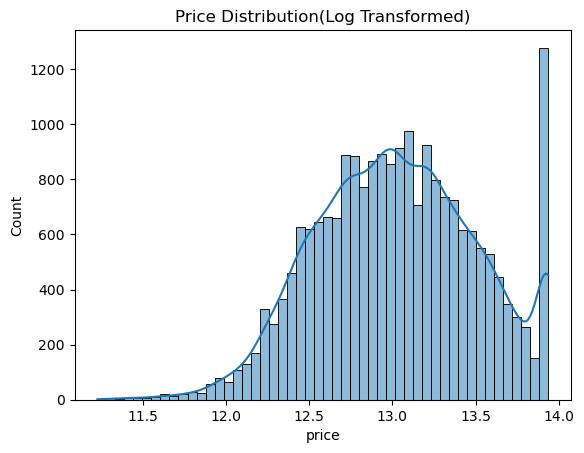

In [17]:
sns.histplot(np.log1p(data['price']),kde= True,bins= 50)
plt.title('Price Distribution(Log Transformed)')

* Rightly skewed

#  Relationships with Key Features

###  Price vs Square feet living

Text(0.5, 1.0, 'Price VS Square feet over Grade')

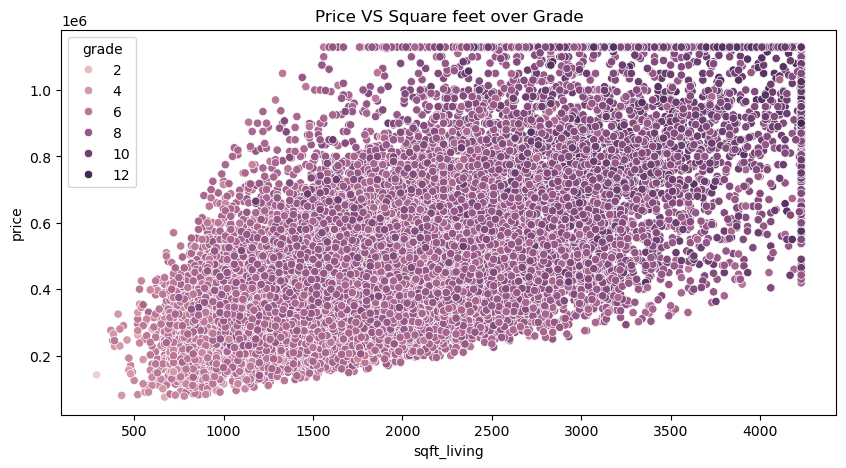

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'sqft_living',y='price',data=data,hue='grade')
plt.title('Price VS Square feet over Grade')

* Seems likes they are Linearly Co-related(strongly).

### Price vs Total area

Text(0.5, 1.0, 'Price vs Total Area')

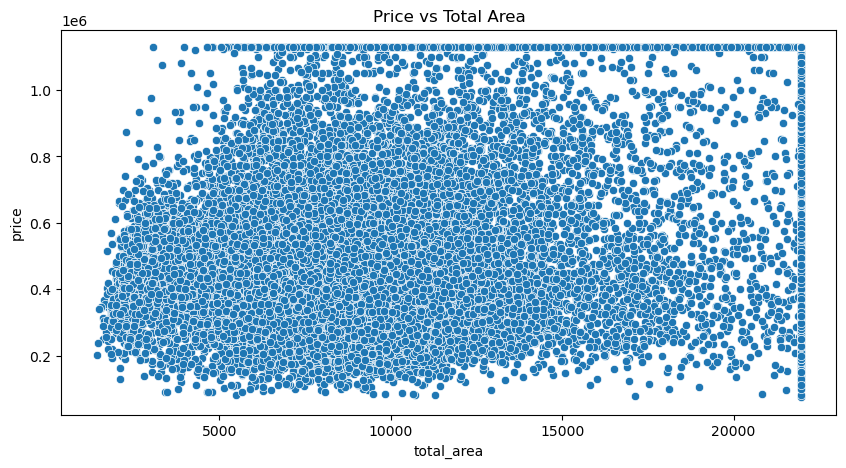

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'total_area',y='price',data=data)
plt.title('Price vs Total Area')

* Has Linear Relation between them(strongly).

### Price vs Bedrooms

Text(0.5, 1.0, 'Price vs Bedrooms')

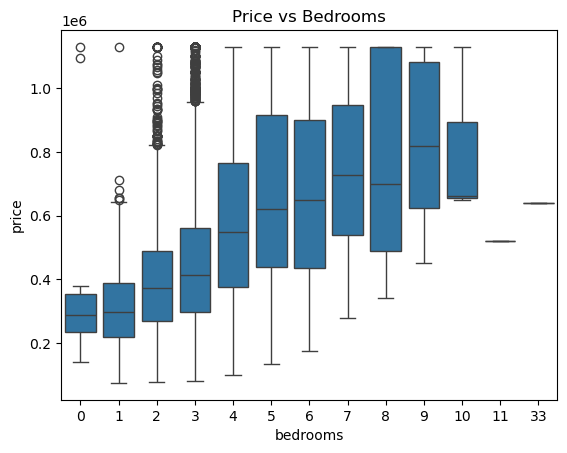

In [20]:
sns.boxplot(x='bedrooms',y= 'price',data=data)
plt.title('Price vs Bedrooms')

### Price vs Bathrooms

Text(0.5, 1.0, 'Price vs Bathrooms')

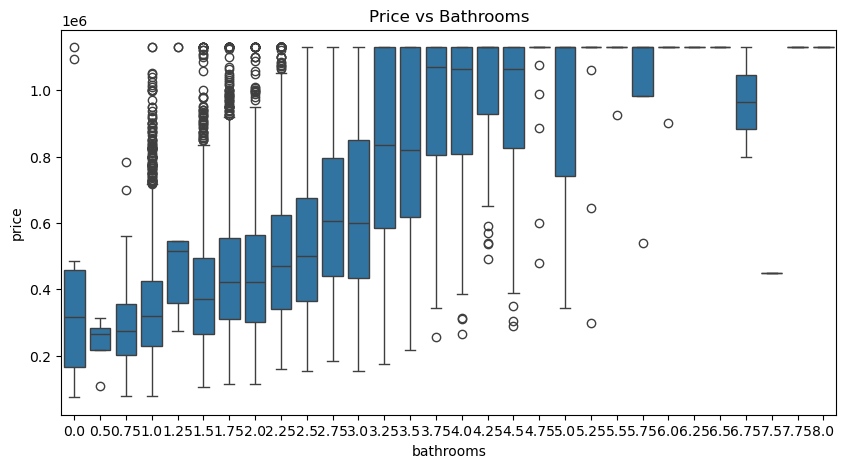

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms',y= 'price',data=data)
plt.title('Price vs Bathrooms')

### Price vs Property Age

Text(0.5, 1.0, 'Price vs Property Age')

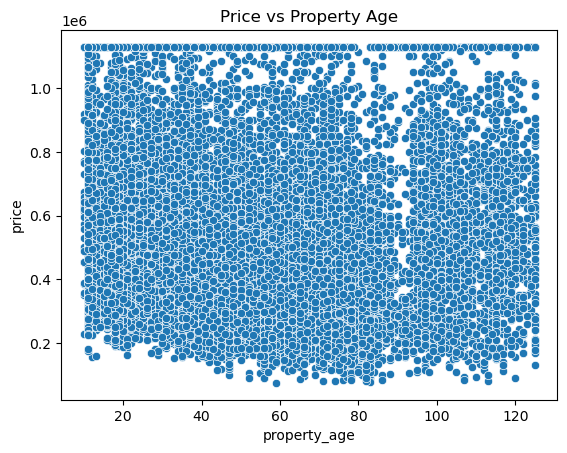

In [22]:
sns.scatterplot(x='property_age',y='price',data=data)
plt.title('Price vs Property Age')

* Non Linear relationship between Property age and Price.

# Time trends in house prices over the period covered

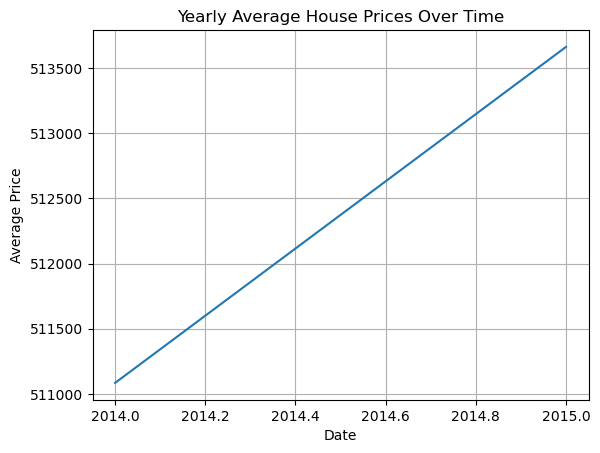

In [23]:
yearly_trends = data.groupby([data['date'].dt.year])['price'].mean()
yearly_trends.plot()
plt.title('Yearly Average House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

* Has Linear Relationship between them(Strongly).
* House price increases over time(yearly).

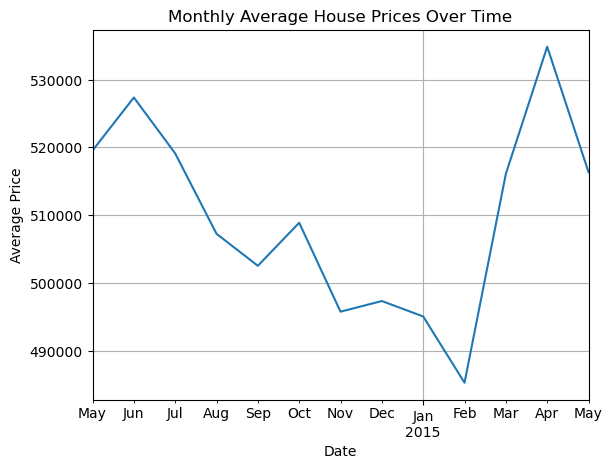

In [24]:
monthly_avg = data.groupby(data['date'].dt.to_period('M'))['price'].mean()
monthly_avg.plot()
plt.title('Monthly Average House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

* At February month 2015 the house price remains very low and at april month 2015 the price remains very high.

# Correlation between numerical features using a heatmap and more 


### Creating new dataset named map_data with numerical features.

In [25]:
map_data = data.select_dtypes(include= np.number).corr()

In [26]:
map_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,total_area,property_age,renovated_age,price per square foot,renovated_house,has_basement
id,1.000000,-0.013534,0.000831,0.004344,-0.011066,-0.134695,0.018057,-0.002746,0.010929,-0.024279,...,-0.002859,0.019466,-0.004084,-0.139670,-0.129281,-0.020933,-0.016860,-0.007363,-0.017212,0.002029
price,-0.013534,1.000000,0.340008,0.535403,0.701163,0.172932,0.298368,0.156324,0.355690,0.040566,...,0.401522,0.044493,0.629661,0.092105,0.257195,-0.063192,-0.116553,0.561129,0.122270,0.195260
bedrooms,0.000831,0.340008,1.000000,0.516772,0.593493,0.181983,0.175207,-0.006685,0.079542,0.027896,...,-0.010228,0.129836,0.393161,0.029117,0.253463,-0.153745,-0.164991,-0.210857,0.018146,0.162733
bathrooms,0.004344,0.535403,0.516772,1.000000,0.748535,0.124411,0.499863,0.063734,0.186684,-0.127839,...,0.023444,0.221935,0.568194,0.086627,0.218848,-0.505092,-0.536486,-0.094969,0.050629,0.163375
sqft_living,-0.011066,0.701163,0.593493,0.748535,1.000000,0.349393,0.362818,0.086603,0.265683,-0.061360,...,0.049783,0.250678,0.762690,0.170524,0.463200,-0.332090,-0.357868,-0.129047,0.053940,0.204044


### Creating heatmap

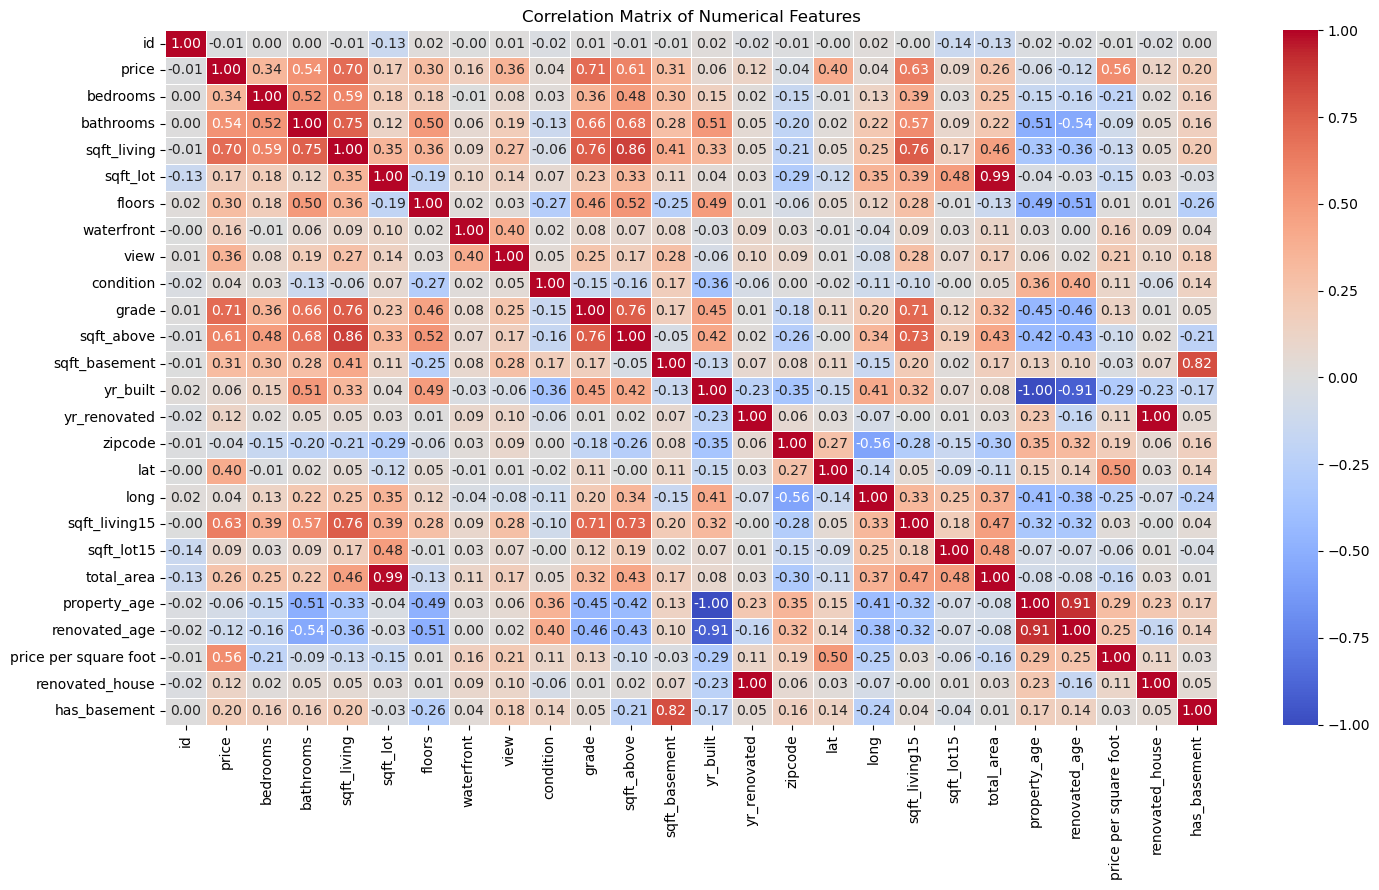

In [27]:
plt.figure(figsize=(15, 9))
sns.heatmap(map_data, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

* sqft_living and grade are strongly correlated with price.

### Price vs Grade

Text(0.5, 1.0, 'Price vs Grade')

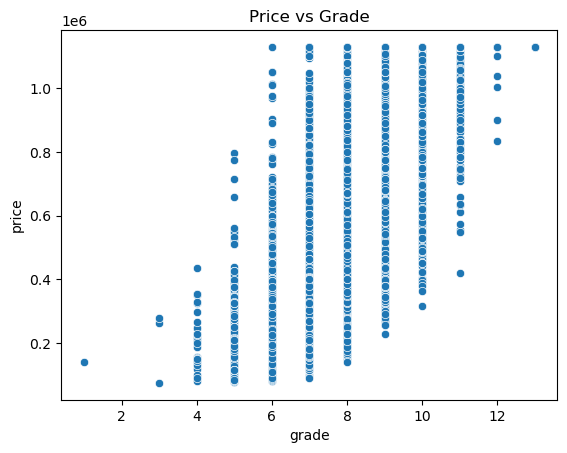

In [28]:
sns.scatterplot(x='grade',y='price',data=data)
plt.title('Price vs Grade')

Text(0.5, 1.0, 'Price vs Zipcode')

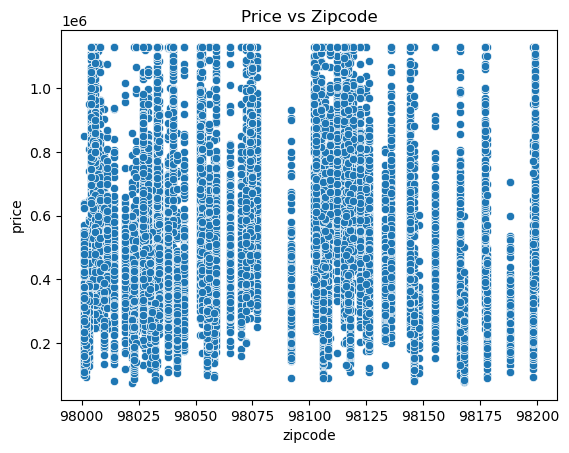

In [29]:
sns.scatterplot(x='zipcode',y='price',data=data)
plt.title('Price vs Zipcode')

* Price changes with zipcodes

### Creating Pairplot

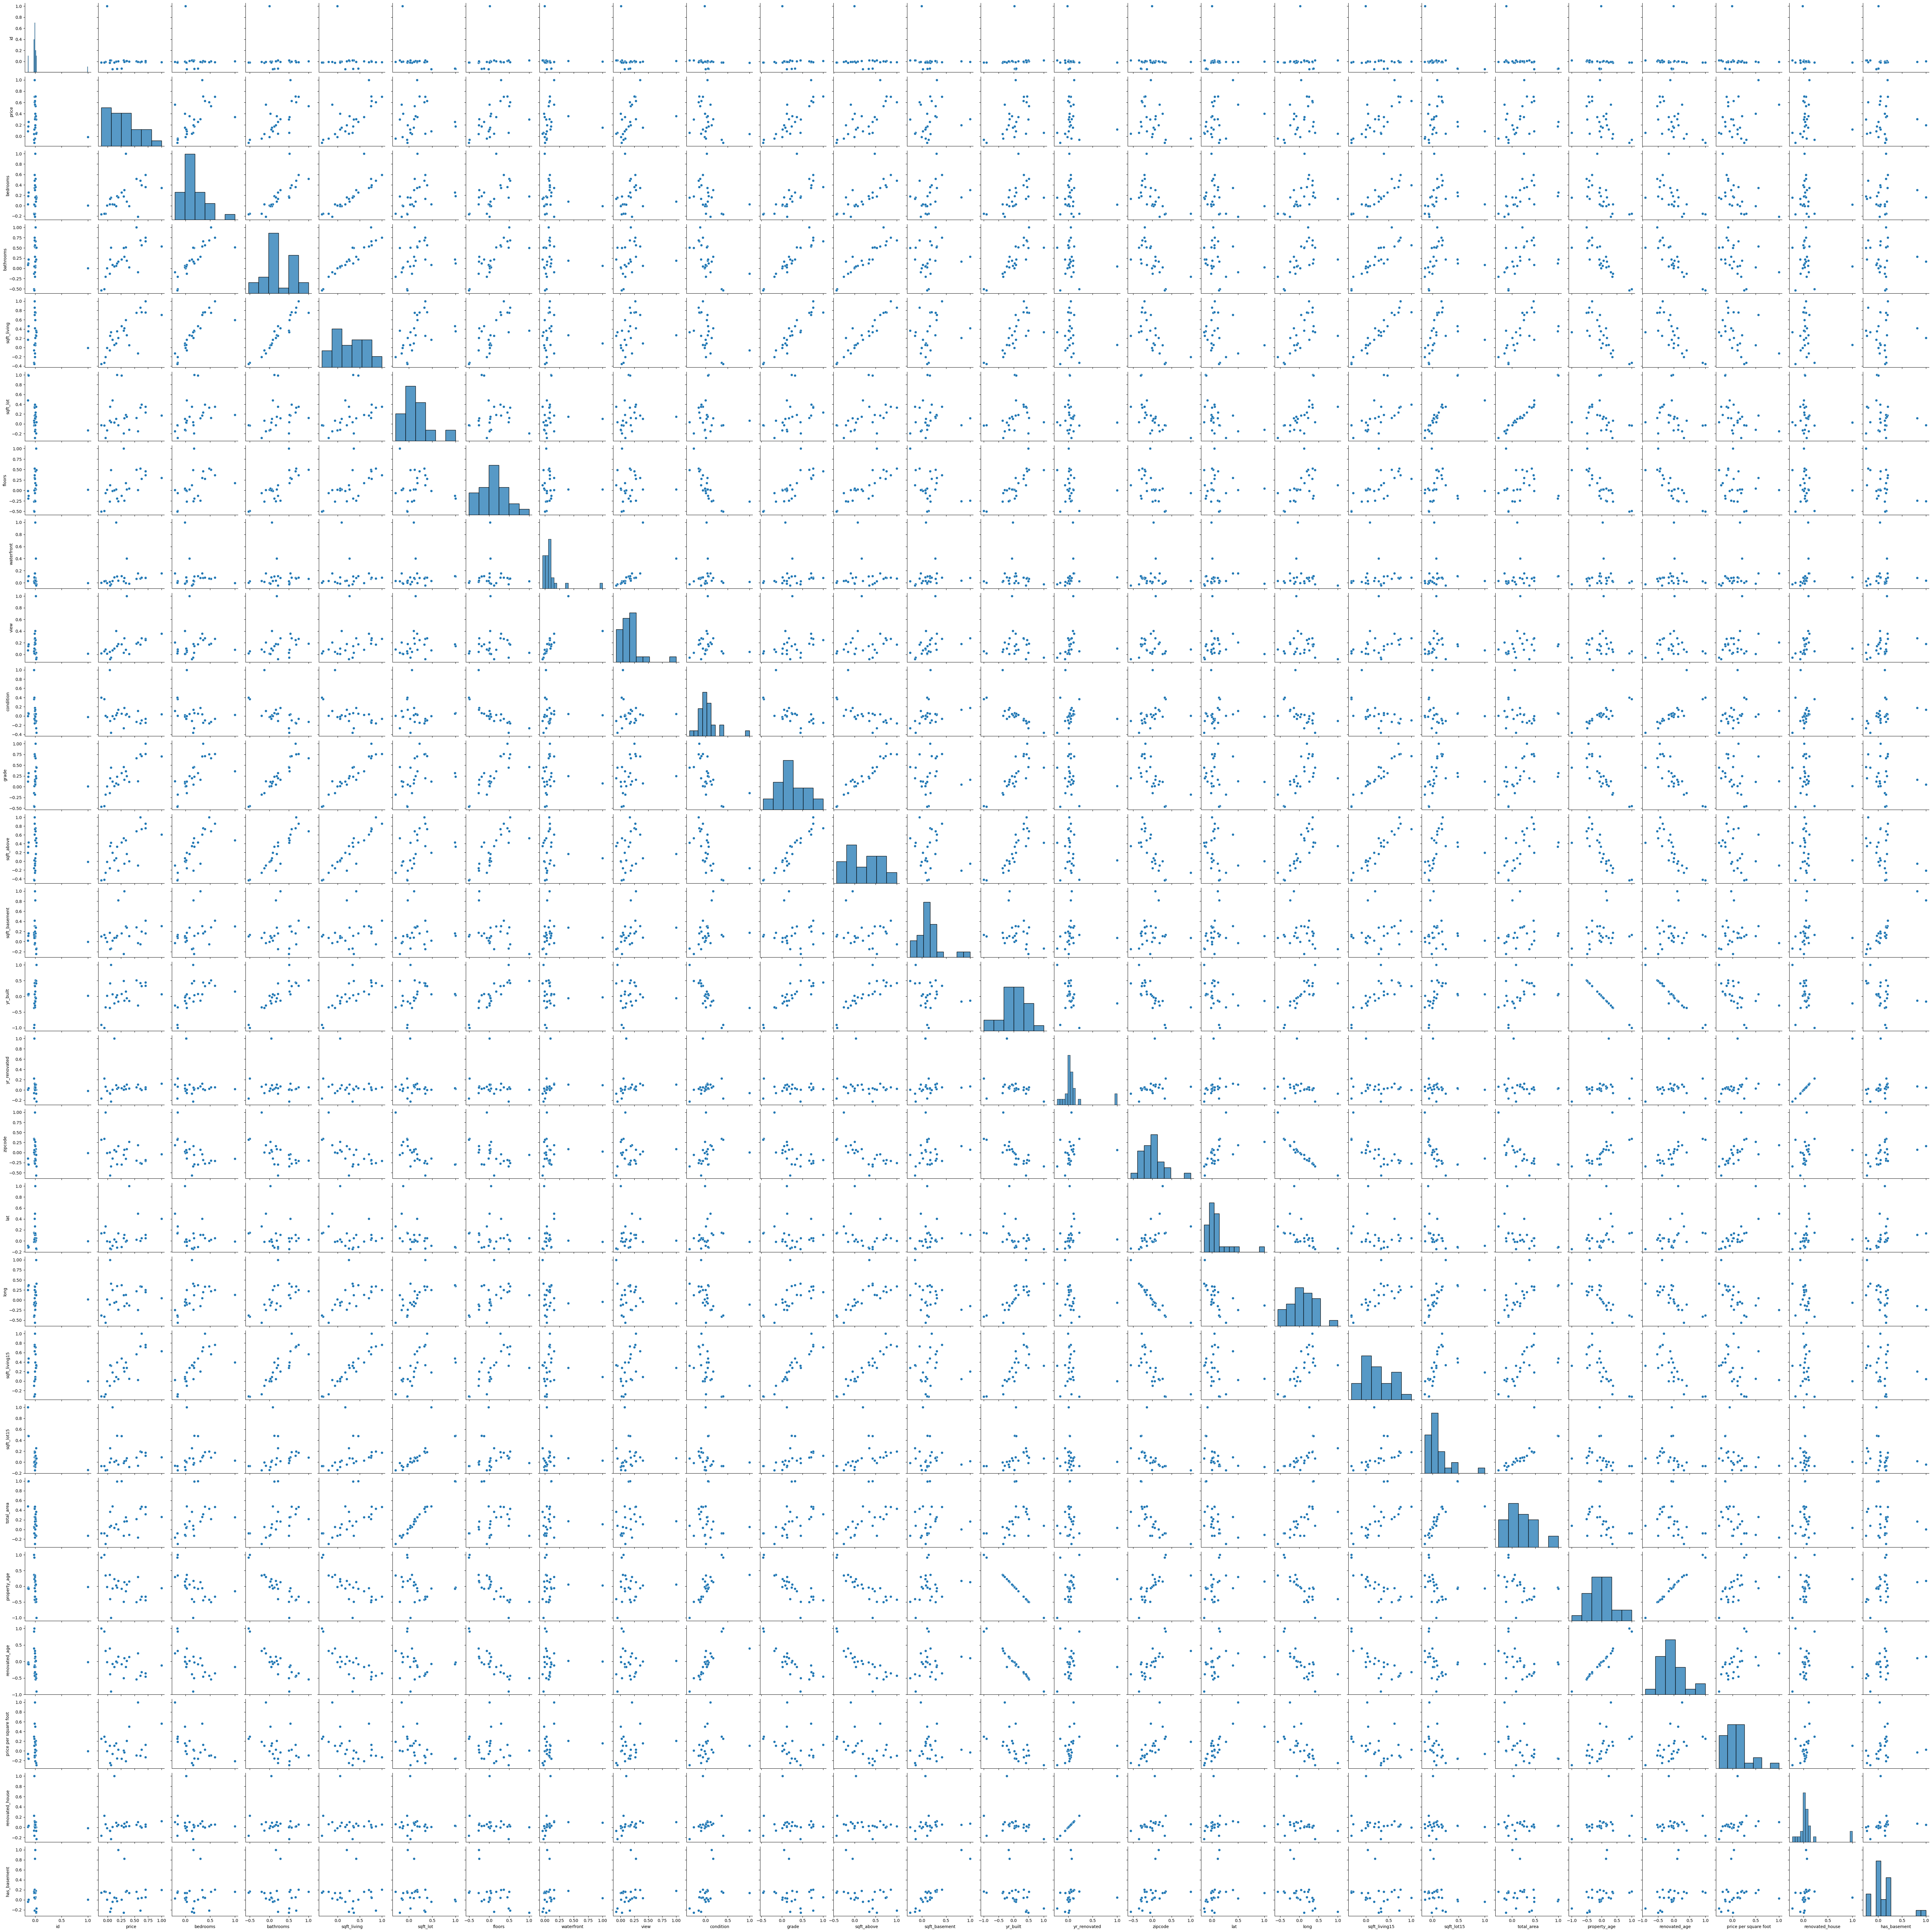

In [30]:
sns.pairplot(map_data)

# Basic Statistical Analysis

### Price

In [31]:
mean = (data['price'].mean()).round(1)
median = data['price'].median()
mode = data['price'].mode()[0]
print(f'Mean: {mean}\n'
      f'Median: {median}\n'
      f'Mode: {mode}')
       

Mean: 511906.7
Median: 450000.0
Mode: 1129275.0


### Total Area

In [32]:
mean = (data['total_area'].mean()).round(1)
median = data['total_area'].median()
mode = data['total_area'].mode()[0]
print(f'Mean: {mean}\n'
      f'Median: {median}\n'
      f'Mode: {mode}')
       

Mean: 10787.6
Median: 9575.0
Mode: 21968.375


# T-test

In [33]:
data['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

* As 3 & 4 bedrooms are most counted so we will do t-test between them

### 3 bedrooms vs 4 bedrooms

In [34]:
bedrooms_3 = data[data['bedrooms']== 3]['price']
bedrooms_4 = data[data['bedrooms']== 4]['price']

In [35]:
from scipy.stats import ttest_ind

t_test,p_value = ttest_ind(bedrooms_3,bedrooms_4)
print(f'T_test: {t_test}\n'
      f'P-value: {p_value}')
if p_value > 0.05: # Assuming Significant level at 5%
    print('Null Hypothesis Accepted : There is not a significant difference in price based on bedrooms.')
else:
    print("Null hypothesis Rejected: There is a significant difference in price based on bedrooms.")

T_test: -37.610723836854426
P-value: 3.7941384934853204e-297
Null hypothesis Rejected: There is a significant difference in price based on bedrooms.


### Total Area

In [36]:
high_area = data[data['total_area'] > data['total_area'].median()]['price']
low_area = data[data['total_area'] <= data['total_area'].median()]['price']

area_t_test,area_p_value = ttest_ind(high_area,low_area)
print(f'T_test: {area_t_test}\n'
      f'P-value: {area_p_value}')
if area_p_value > 0.05: # Assuming Significant level at 5%
    print('Null Hypothesis Accepted : There is not a significant difference in price based on tota_area.')
else:
    print("Null hypothesis Rejected: There is a significant difference in price based on tota_area.")

T_test: 26.279216395236233
P-value: 7.807052602781118e-150
Null hypothesis Rejected: There is a significant difference in price based on tota_area.


In [37]:
# Final documentation cell
print("""
DATA CLEANING AND EDA REPORT - HOUSE SALES IN KING COUNTY

DATA CLEANING:
1. Missing Values: No missing values were found in the original dataset
2. Duplicates: No duplicate records were found
3. Date Conversion: 'date' column converted to datetime format
4. Derived Features:
   - total_area: sum of sqft_living and sqft_lot.
   - property_age: current year minus year built.
   - renovated_age: current year minus yr_renovated.
   - price per square foot: price divided by sqft_living.
   - renovated_house: binary indicator for renovated_house presence(1 = presence, 0 = absence).
   - has_basement: binary indicator for basement presence(1 = presence, 0 = absence).
   
5. Outliers: Handled using IQR method for key numerical columns

KEY FINDINGS:
1. Price Distribution: Right-skewed distribution, typical for real estate prices
2. Strong Correlations: sqft_living, grade, and bathrooms show strongest positive correlation with price
3. Time Trends: Appreciating trend in house prices over the period
4. Location Impact: Significant price variations across different zipcodes
5. Feature Importance: sqft_living and property grade are strongest predictors of price

STATISTICAL INSIGHTS:
1. The average house price is approximately ${:,.0f}
2. T-tests show significant price differences based on bedroom count and total area.

The analysis provides comprehensive insights into the King County housing market,
highlighting key factors that influence property prices.
""".format(data['price'].mean()))


DATA CLEANING AND EDA REPORT - HOUSE SALES IN KING COUNTY

DATA CLEANING:
1. Missing Values: No missing values were found in the original dataset
2. Duplicates: No duplicate records were found
3. Date Conversion: 'date' column converted to datetime format
4. Derived Features:
   - total_area: sum of sqft_living and sqft_lot.
   - property_age: current year minus year built.
   - renovated_age: current year minus yr_renovated.
   - price per square foot: price divided by sqft_living.
   - renovated_house: binary indicator for renovated_house presence(1 = presence, 0 = absence).
   - has_basement: binary indicator for basement presence(1 = presence, 0 = absence).
   
5. Outliers: Handled using IQR method for key numerical columns

KEY FINDINGS:
1. Price Distribution: Right-skewed distribution, typical for real estate prices
2. Strong Correlations: sqft_living, grade, and bathrooms show strongest positive correlation with price
3. Time Trends: Appreciating trend in house prices over the 